In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

# Files to load
city_data_to_load = "ResourCes/city_data.csv"
ride_data_to_load = "ResourCes/ride_data.csv"



In [2]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
# Ger the columns and the rows that are not null
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the colums and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get columns and the rows that not nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [48]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='right', on=["city", "city"])
# pyber_data_df
# city_data_df
# Display the the DataFrame

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [47]:
# Create the Urban DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# urban_cities_df.head()



In [46]:
# Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# suburban_cities_df.head()
# rural_cities_df.head()

In [44]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# urban_ride_count

In [38]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [43]:
# suburban_ride_count
# rural_ride_count

In [53]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# urban_avg_fare.head()

In [54]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [57]:
# Get the average number of drivers for each urban city

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [92]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# suburban_driver_count
# rural_driver_count

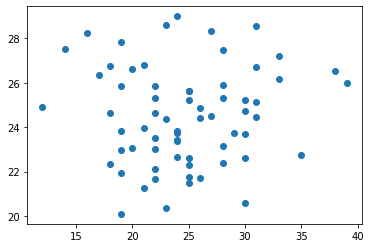

In [69]:
# Build the  scatter plots for urban cities

plt.scatter(urban_ride_count, urban_avg_fare)

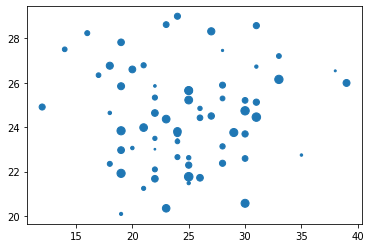

In [70]:
plt.scatter(urban_ride_count,
    urban_avg_fare, s= urban_driver_count)

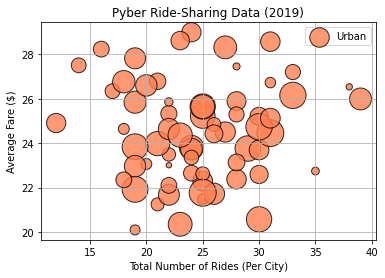

In [80]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count, c="coral",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.

plt.legend()

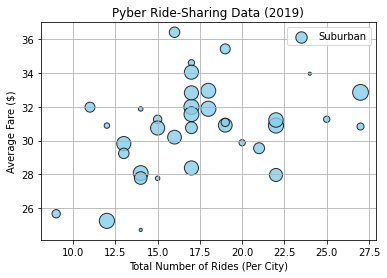

In [85]:
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

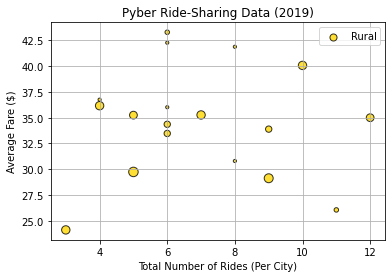

In [102]:
# Build scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
            c="gold", edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

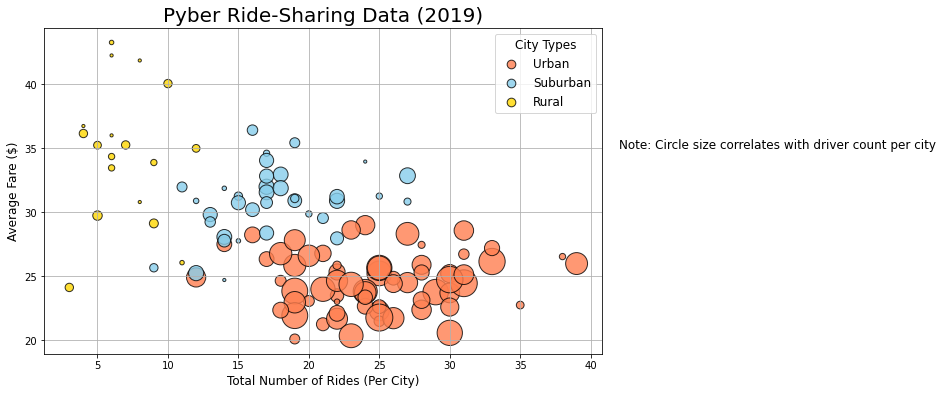

In [132]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count, c="coral",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Creating a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
            scatterpoints=1, loc="best", title= "City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()